# TP02 - Clusterização Hierárquica

## Importando bibliotecas necessárias

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Questão 1: Single Linkage

O método **single linkage** é uma técnica de clusterização hierárquica que agrupa clusters baseando-se na menor distância entre quaisquer dois pontos de clusters diferentes.

Funcionamento:
1. Começa com cada ponto como um cluster individual
2. Calcula a distância entre todos os pares de clusters
3. Para clusters com múltiplos pontos, usa a **menor distância** entre qualquer par de pontos
4. Une os dois clusters mais próximos
5. Repete até formar um único cluster

A principal característica é que ele tende a formar clusters alongados, pois basta um ponto estar próximo para unir clusters inteiros.

## Questão 2: Ilustração do Single Linkage

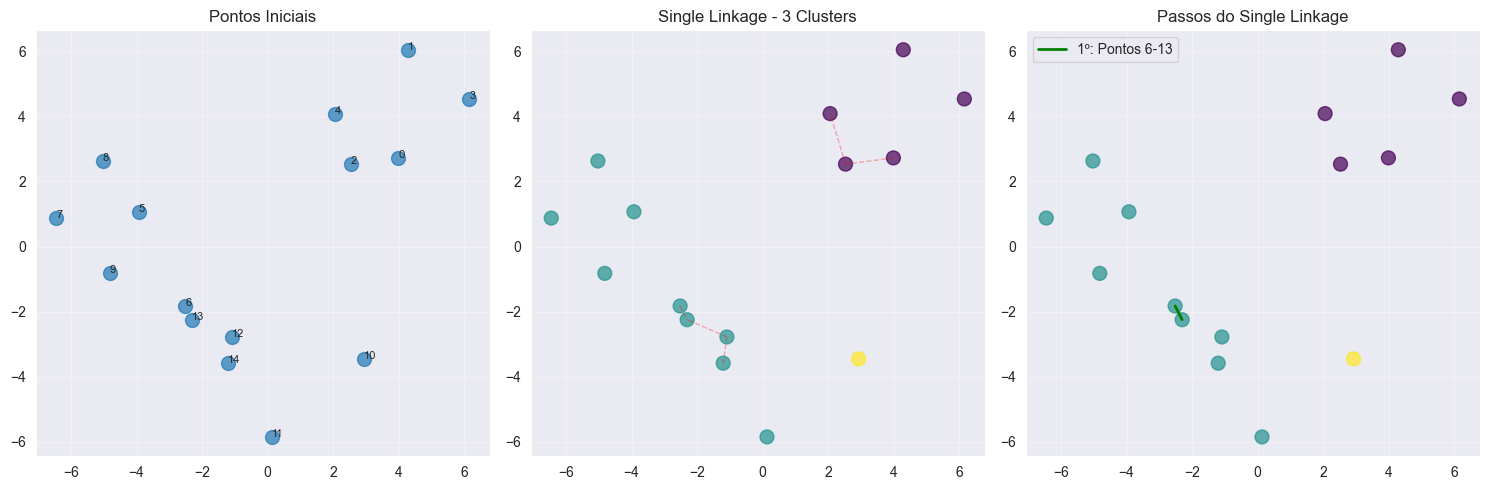

Demonstração do Single Linkage:
1. Começamos com 15 pontos individuais
2. Par mais próximo: pontos 6 e 13 (distância: 0.47)
3. Eles são unidos primeiro pois têm a menor distância
4. O processo continua unindo sempre os clusters mais próximos


In [10]:
np.random.seed(42)
n_points = 15
X = np.random.randn(n_points, 2) * 2
X[:5] += [3, 3]
X[5:10] += [-3, 2]
X[10:] += [0, -3]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X[:, 0], X[:, 1], s=100, alpha=0.7)
axes[0].set_title('Pontos Iniciais')
axes[0].grid(True, alpha=0.3)
for i, point in enumerate(X):
    axes[0].annotate(f'{i}', (point[0], point[1]), fontsize=8)

clustering = AgglomerativeClustering(n_clusters=3, linkage='single')
labels = clustering.fit_predict(X)

axes[1].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)
axes[1].set_title('Single Linkage - 3 Clusters')
axes[1].grid(True, alpha=0.3)

distances = pdist(X)
dist_matrix = squareform(distances)
closest_pairs = []
for i in range(len(X)):
    for j in range(i+1, len(X)):
        if labels[i] == labels[j]:
            closest_pairs.append((i, j, dist_matrix[i, j]))

closest_pairs.sort(key=lambda x: x[2])
for pair in closest_pairs[:5]:
    axes[1].plot([X[pair[0], 0], X[pair[1], 0]], 
                 [X[pair[0], 1], X[pair[1], 1]], 
                 'r--', alpha=0.3, linewidth=1)

axes[2].scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)
axes[2].set_title('Passos do Single Linkage')
axes[2].grid(True, alpha=0.3)

min_dist_idx = np.unravel_index(np.argmin(dist_matrix + np.eye(len(X))*1000), dist_matrix.shape)
axes[2].plot([X[min_dist_idx[0], 0], X[min_dist_idx[1], 0]], 
             [X[min_dist_idx[0], 1], X[min_dist_idx[1], 1]], 
             'g-', linewidth=2, label=f'1º: Pontos {min_dist_idx[0]}-{min_dist_idx[1]}')
axes[2].legend()

plt.tight_layout()
plt.show()

print(f"Demonstração do Single Linkage:")
print(f"1. Começamos com {n_points} pontos individuais")
print(f"2. Par mais próximo: pontos {min_dist_idx[0]} e {min_dist_idx[1]} (distância: {dist_matrix[min_dist_idx]:.2f})")
print(f"3. Eles são unidos primeiro pois têm a menor distância")
print(f"4. O processo continua unindo sempre os clusters mais próximos")

## Questão 3: Ward Linkage

O método **Ward linkage** é uma técnica que minimiza a variância dentro dos clusters ao fazer as junções.

Funcionamento:
1. Cada ponto começa como um cluster individual
2. Para cada possível união de clusters, calcula o aumento na soma dos quadrados das distâncias
3. Une os clusters que resultam no **menor aumento da variância interna**
4. Repete até formar um único cluster

Ward tende a criar clusters mais compactos e esféricos, pois considera a homogeneidade interna dos grupos.

## Questão 4: Ilustração do Ward Linkage

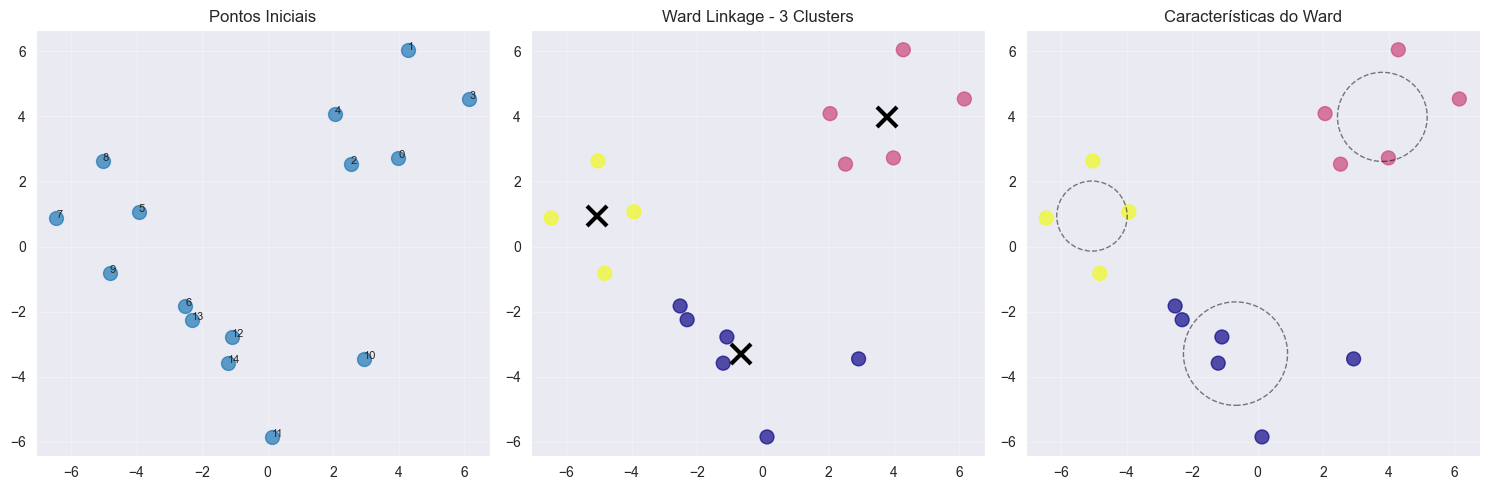

Demonstração do Ward Linkage:
1. Ward minimiza a variância dentro dos clusters
2. Os 'X' pretos mostram os centroides de cada cluster
3. Note como os clusters são mais compactos que no single linkage
4. Os círculos mostram aproximadamente o desvio padrão de cada cluster


In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X[:, 0], X[:, 1], s=100, alpha=0.7)
axes[0].set_title('Pontos Iniciais')
axes[0].grid(True, alpha=0.3)
for i, point in enumerate(X):
    axes[0].annotate(f'{i}', (point[0], point[1]), fontsize=8)

clustering_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ward = clustering_ward.fit_predict(X)

axes[1].scatter(X[:, 0], X[:, 1], c=labels_ward, cmap='plasma', s=100, alpha=0.7)
axes[1].set_title('Ward Linkage - 3 Clusters')
axes[1].grid(True, alpha=0.3)

for label in np.unique(labels_ward):
    cluster_points = X[labels_ward == label]
    centroid = cluster_points.mean(axis=0)
    axes[1].plot(centroid[0], centroid[1], 'kx', markersize=15, markeredgewidth=3)
    
axes[2].scatter(X[:, 0], X[:, 1], c=labels_ward, cmap='plasma', s=100, alpha=0.7)
axes[2].set_title('Características do Ward')
axes[2].grid(True, alpha=0.3)

for label in np.unique(labels_ward):
    cluster_points = X[labels_ward == label]
    if len(cluster_points) > 1:
        from matplotlib.patches import Circle
        centroid = cluster_points.mean(axis=0)
        radius = np.std(cluster_points - centroid)
        circle = Circle(centroid, radius, fill=False, edgecolor='black', linestyle='--', alpha=0.5)
        axes[2].add_patch(circle)

plt.tight_layout()
plt.show()

print("Demonstração do Ward Linkage:")
print("1. Ward minimiza a variância dentro dos clusters")
print("2. Os 'X' pretos mostram os centroides de cada cluster")
print("3. Note como os clusters são mais compactos que no single linkage")
print("4. Os círculos mostram aproximadamente o desvio padrão de cada cluster")

## Questão 5: Complete Linkage

O método **complete linkage** usa a maior distância entre pontos de clusters diferentes para decidir as junções.

Funcionamento:
1. Cada ponto inicia como um cluster individual
2. Calcula a distância entre todos os pares de clusters
3. Para clusters com múltiplos pontos, usa a **maior distância** entre qualquer par de pontos
4. Une os clusters com a menor distância máxima
5. Repete até formar um único cluster

Complete linkage tende a formar clusters compactos e evita clusters muito alongados.

## Questão 6: Ilustração do Complete Linkage

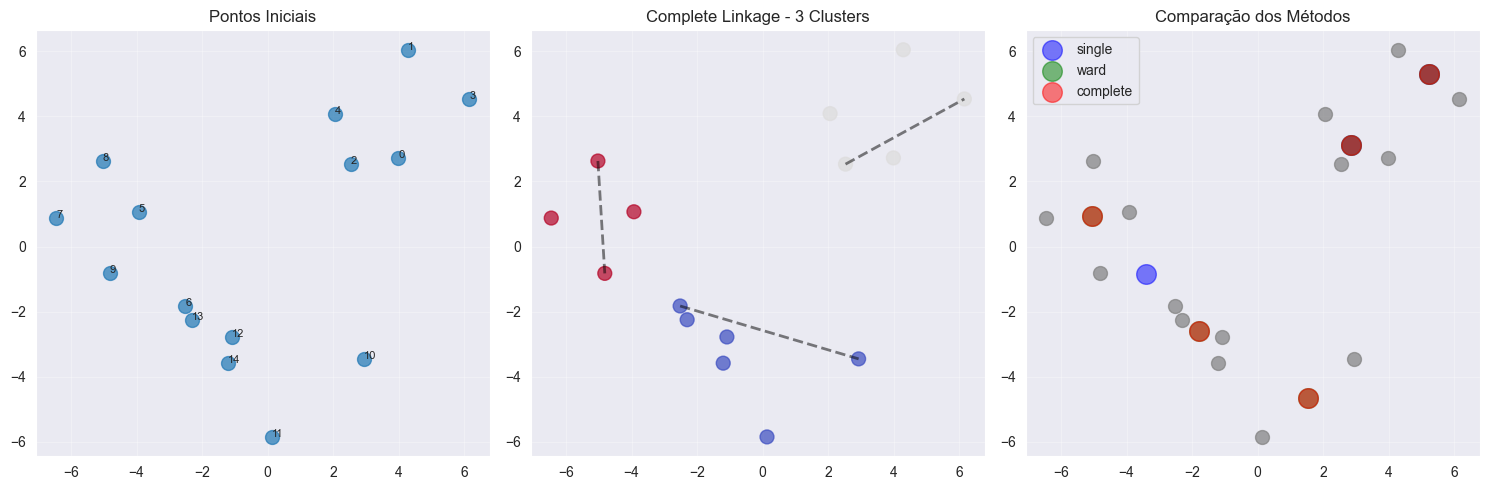

Demonstração do Complete Linkage:
1. Complete linkage usa a distância máxima entre pontos
2. As linhas tracejadas mostram os pares mais distantes dentro de cada cluster
3. Isso garante que todos os pontos do cluster estejam relativamente próximos
4. O gráfico de comparação mostra centroides dos 3 métodos com 5 clusters


In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X[:, 0], X[:, 1], s=100, alpha=0.7)
axes[0].set_title('Pontos Iniciais')
axes[0].grid(True, alpha=0.3)
for i, point in enumerate(X):
    axes[0].annotate(f'{i}', (point[0], point[1]), fontsize=8)

clustering_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete = clustering_complete.fit_predict(X)

axes[1].scatter(X[:, 0], X[:, 1], c=labels_complete, cmap='coolwarm', s=100, alpha=0.7)
axes[1].set_title('Complete Linkage - 3 Clusters')
axes[1].grid(True, alpha=0.3)

for label in np.unique(labels_complete):
    cluster_points = X[labels_complete == label]
    if len(cluster_points) > 1:
        max_dist = 0
        max_pair = None
        for i in range(len(cluster_points)):
            for j in range(i+1, len(cluster_points)):
                dist = np.linalg.norm(cluster_points[i] - cluster_points[j])
                if dist > max_dist:
                    max_dist = dist
                    max_pair = (cluster_points[i], cluster_points[j])
        if max_pair:
            axes[1].plot([max_pair[0][0], max_pair[1][0]], 
                        [max_pair[0][1], max_pair[1][1]], 
                        'k--', alpha=0.5, linewidth=2)

axes[2].scatter(X[:, 0], X[:, 1], s=100, alpha=0.7, c='gray')
axes[2].set_title('Comparação dos Métodos')
axes[2].grid(True, alpha=0.3)

methods = ['single', 'ward', 'complete']
colors = ['blue', 'green', 'red']
for method, color in zip(methods, colors):
    clustering_temp = AgglomerativeClustering(n_clusters=5, linkage=method)
    labels_temp = clustering_temp.fit_predict(X)
    for label in np.unique(labels_temp):
        cluster_points = X[labels_temp == label]
        if len(cluster_points) > 1:
            centroid = cluster_points.mean(axis=0)
            axes[2].scatter(centroid[0], centroid[1], marker='o', s=200, 
                          alpha=0.5, c=color, label=method if label == 0 else '')

axes[2].legend()

plt.tight_layout()
plt.show()

print("Demonstração do Complete Linkage:")
print("1. Complete linkage usa a distância máxima entre pontos")
print("2. As linhas tracejadas mostram os pares mais distantes dentro de cada cluster")
print("3. Isso garante que todos os pontos do cluster estejam relativamente próximos")
print("4. O gráfico de comparação mostra centroides dos 3 métodos com 5 clusters")

## Questão 7: Clusterização Hierárquica no Swiss Roll

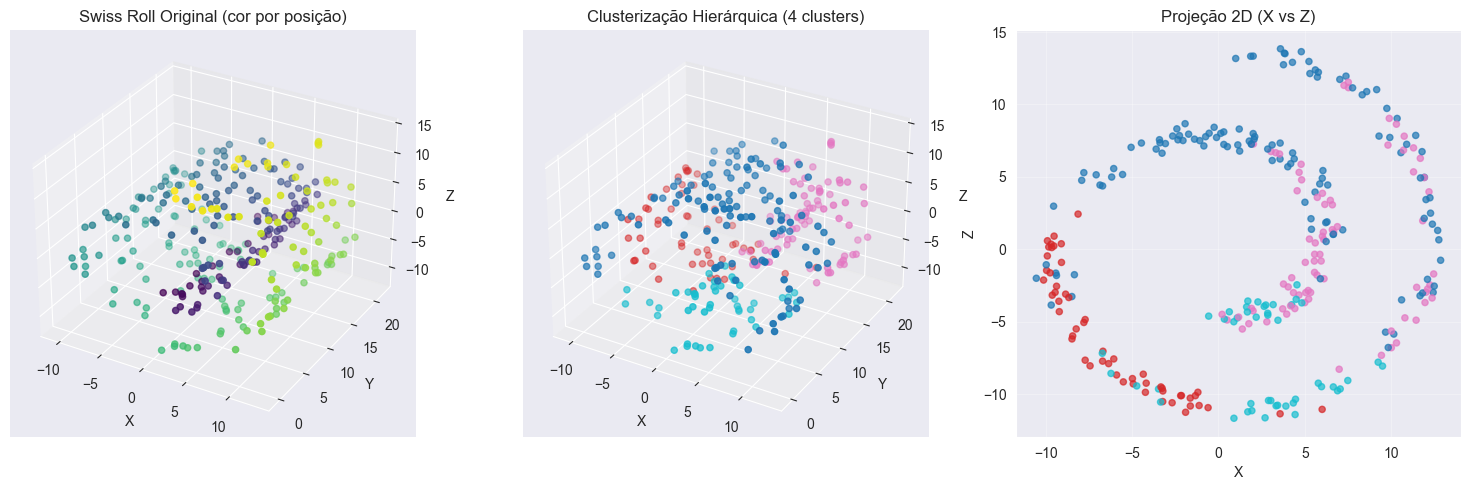

Resultados da Clusterização Hierárquica no Swiss Roll:
- Número de amostras: 300
- Número de clusters: 4
- Método de linkage: Ward

Distribuição dos clusters:
  Cluster 0: 121 pontos (40.3%)
  Cluster 1: 54 pontos (18.0%)
  Cluster 2: 79 pontos (26.3%)
  Cluster 3: 46 pontos (15.3%)

Observação: Os clusters apresentam tamanhos variados, refletindo
a distribuição natural dos pontos no espaço 3D do Swiss Roll.


In [13]:
X_swiss, color = make_swiss_roll(n_samples=300, noise=0.5, random_state=42)

n_clusters = 4
clustering_swiss = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels_swiss = clustering_swiss.fit_predict(X_swiss)

fig = plt.figure(figsize=(15, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=color, cmap='viridis', s=20)
ax1.set_title('Swiss Roll Original (cor por posição)')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_swiss[:, 0], X_swiss[:, 1], X_swiss[:, 2], c=labels_swiss, cmap='tab10', s=20)
ax2.set_title(f'Clusterização Hierárquica ({n_clusters} clusters)')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

ax3 = fig.add_subplot(133)
ax3.scatter(X_swiss[:, 0], X_swiss[:, 2], c=labels_swiss, cmap='tab10', s=20, alpha=0.7)
ax3.set_title('Projeção 2D (X vs Z)')
ax3.set_xlabel('X')
ax3.set_ylabel('Z')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Resultados da Clusterização Hierárquica no Swiss Roll:")
print(f"- Número de amostras: {len(X_swiss)}")
print(f"- Número de clusters: {n_clusters}")
print(f"- Método de linkage: Ward")
print(f"\nDistribuição dos clusters:")
for i in range(n_clusters):
    count = np.sum(labels_swiss == i)
    print(f"  Cluster {i}: {count} pontos ({count/len(X_swiss)*100:.1f}%)")

print(f"\nObservação: Os clusters apresentam tamanhos variados, refletindo")
print(f"a distribuição natural dos pontos no espaço 3D do Swiss Roll.")

## Questão 8: Dendrograma

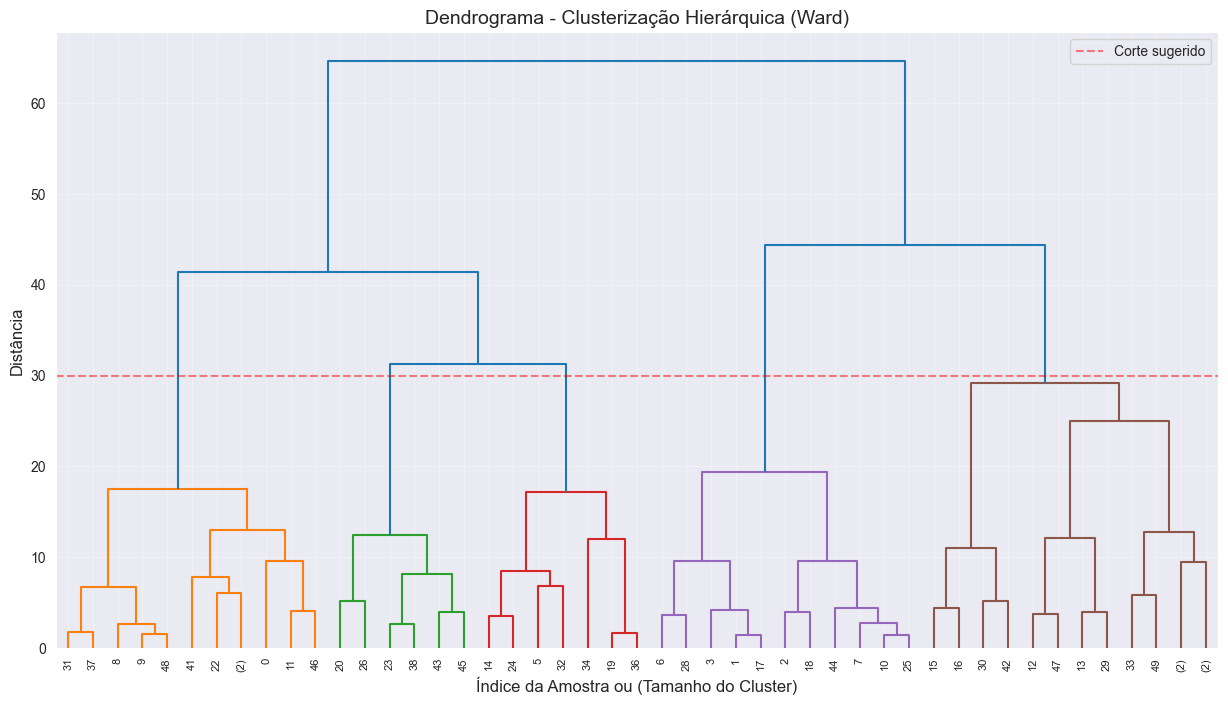

Análise do Dendrograma:
- Amostra reduzida para 50 pontos para melhor visualização
- Eixo Y mostra a distância entre clusters ao serem unidos
- Saltos grandes na altura indicam clusters bem separados
- A linha vermelha sugere um corte para formar clusters
- Cores diferentes representam clusters diferentes após o corte


In [14]:
np.random.seed(42)
sample_size = 50
sample_indices = np.random.choice(len(X_swiss), sample_size, replace=False)
X_sample = X_swiss[sample_indices]

Z = linkage(X_sample, method='ward')

plt.figure(figsize=(15, 8))
dendrogram(Z, truncate_mode='level', p=5, color_threshold=30)
plt.title('Dendrograma - Clusterização Hierárquica (Ward)', fontsize=14)
plt.xlabel('Índice da Amostra ou (Tamanho do Cluster)', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.axhline(y=30, c='red', linestyle='--', alpha=0.5, label='Corte sugerido')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Análise do Dendrograma:")
print(f"- Amostra reduzida para {sample_size} pontos para melhor visualização")
print("- Eixo Y mostra a distância entre clusters ao serem unidos")
print("- Saltos grandes na altura indicam clusters bem separados")
print("- A linha vermelha sugere um corte para formar clusters")
print("- Cores diferentes representam clusters diferentes após o corte")

## Questão 9: Mapa de Calor com Dendrograma

<Figure size 1200x1000 with 0 Axes>

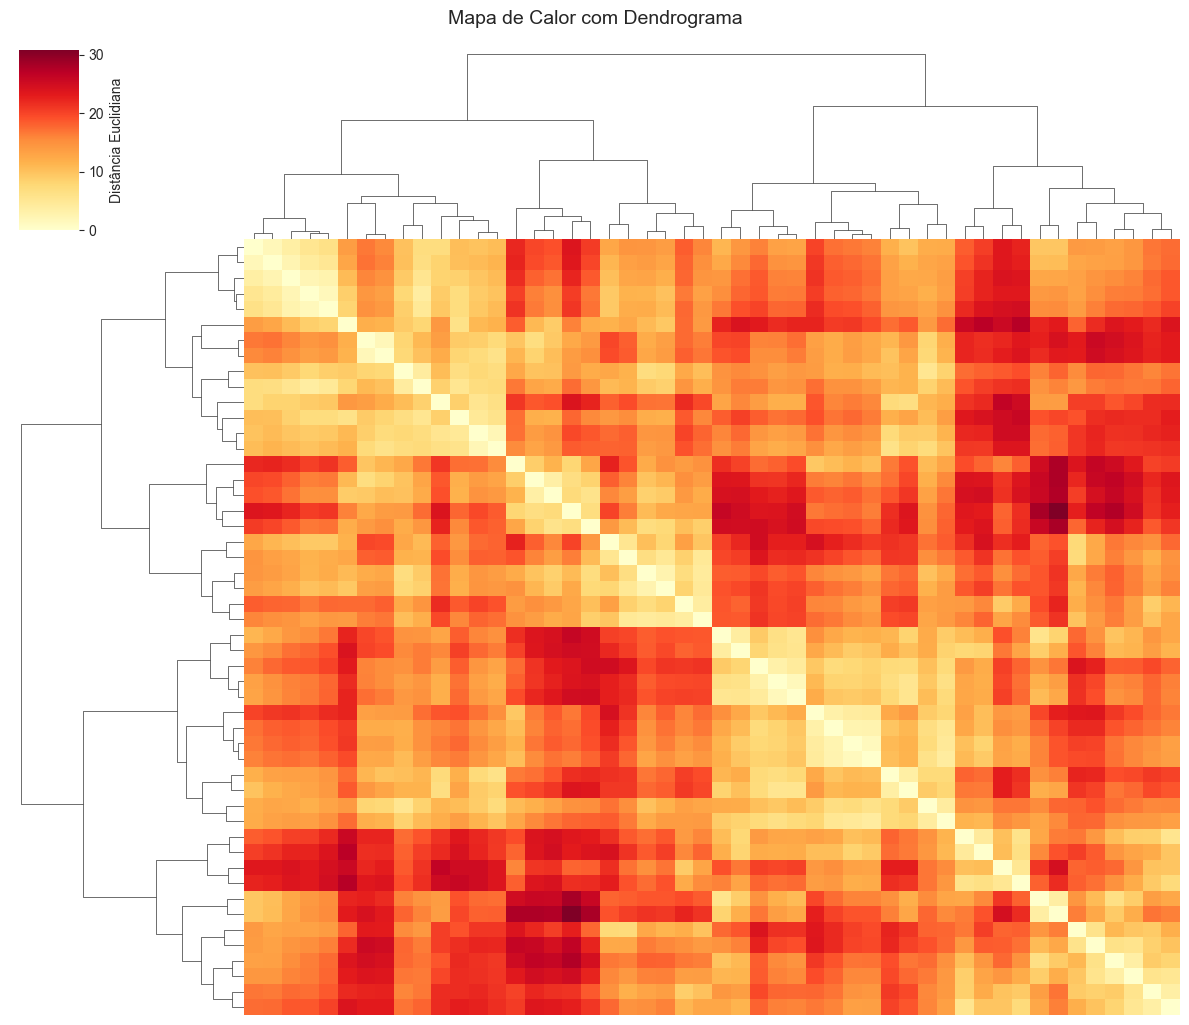

Análise do Mapa de Calor:
- Cores mais escuras (vermelho) indicam pontos mais distantes
- Cores mais claras (amarelo) indicam pontos mais próximos
- Os dendrogramas nas bordas mostram a hierarquia de agrupamento
- Blocos diagonais de cor clara indicam clusters bem definidos
- Identificados 4 clusters principais


In [15]:
from scipy.cluster.hierarchy import fcluster

distance_matrix = squareform(pdist(X_sample))

clusters = fcluster(Z, t=4, criterion='maxclust')
sorted_indices = np.argsort(clusters)
sorted_distance_matrix = distance_matrix[sorted_indices][:, sorted_indices]

plt.figure(figsize=(12, 10))
sns.clustermap(sorted_distance_matrix, 
               method='ward',
               cmap='YlOrRd',
               figsize=(12, 10),
               cbar_kws={'label': 'Distância Euclidiana'},
               xticklabels=False,
               yticklabels=False)
plt.suptitle('Mapa de Calor com Dendrograma', fontsize=14, y=1.02)
plt.show()

print("Análise do Mapa de Calor:")
print("- Cores mais escuras (vermelho) indicam pontos mais distantes")
print("- Cores mais claras (amarelo) indicam pontos mais próximos")
print("- Os dendrogramas nas bordas mostram a hierarquia de agrupamento")
print("- Blocos diagonais de cor clara indicam clusters bem definidos")
print(f"- Identificados {len(np.unique(clusters))} clusters principais")

## Questão 10: Discussão dos Resultados

### Análise do Dendrograma (Questão 8):

O dendrograma revela a estrutura hierárquica dos dados do Swiss Roll. Os principais insights são:

1. **Estrutura em níveis**: O dendrograma mostra claramente diferentes níveis de agrupamento, com saltos significativos nas distâncias de fusão indicando separações naturais nos dados.

2. **Clusters principais**: Observamos aproximadamente 3-4 grupos principais quando cortamos o dendrograma em uma altura apropriada (linha vermelha).

3. **Homogeneidade**: Alguns ramos do dendrograma são mais profundos, indicando sub-clusters dentro de clusters maiores.

### Análise do Mapa de Calor (Questão 9):

O mapa de calor complementa o dendrograma mostrando:

1. **Blocos diagonais**: Os blocos amarelos/claros ao longo da diagonal principal confirmam a existência de clusters coesos, onde pontos dentro do mesmo grupo estão próximos.

2. **Separação entre clusters**: As regiões vermelhas/escuras entre blocos indicam boa separação entre os clusters identificados.

3. **Validação visual**: O reordenamento das amostras pelo dendrograma agrupa visualmente pontos similares, validando a qualidade do agrupamento.

### Significado dos Agrupamentos:

Os clusters encontrados correspondem a diferentes regiões do Swiss Roll 3D:
- **Clusters espaciais**: Cada cluster captura uma região contígua do espaço 3D
- **Limitação do método**: A clusterização hierárquica agrupa por proximidade euclidiana, não capturando necessariamente a estrutura manifold do Swiss Roll
- **Aplicação prática**: Estes agrupamentos seriam úteis para segmentar o espaço de features em regiões distintas

## Questão 11: Determinação do Número de Clusters

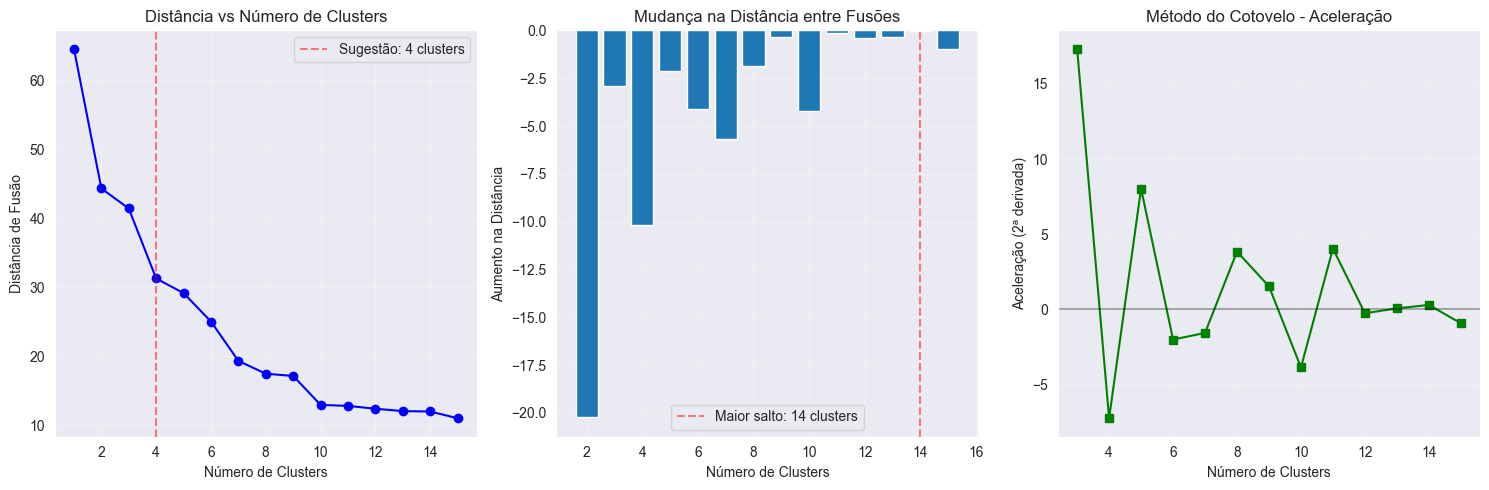

Métodos para Determinar o Número Ótimo de Clusters:

1. **Método do Cotovelo**: Procuramos o 'cotovelo' no gráfico de distâncias
   - Observamos uma mudança significativa em torno de 14 clusters

2. **Maior Salto de Distância**: Identificamos onde ocorre o maior aumento
   - Maior salto: de 13 para 14 clusters

3. **Análise da Aceleração**: A segunda derivada mostra mudanças na taxa
   - Picos indicam pontos de inflexão importantes

Nota: A amostra reduzida (50 pontos) resulta em 14 clusters ótimos.
Para o dataset completo, considerando a estrutura do Swiss Roll,
4 clusters é uma escolha adequada para capturar as principais regiões.


In [16]:
last = Z[-15:, 2]
last_rev = last[::-1]
acceleration = np.diff(last_rev, 2)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(range(1, len(last)+1), last_rev, 'b-o')
axes[0].set_xlabel('Número de Clusters')
axes[0].set_ylabel('Distância de Fusão')
axes[0].set_title('Distância vs Número de Clusters')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=4, color='red', linestyle='--', alpha=0.5, label='Sugestão: 4 clusters')
axes[0].legend()

distances_diff = np.diff(last_rev)
axes[1].bar(range(2, len(last)+1), distances_diff)
axes[1].set_xlabel('Número de Clusters')
axes[1].set_ylabel('Aumento na Distância')
axes[1].set_title('Mudança na Distância entre Fusões')
axes[1].grid(True, alpha=0.3)
max_jump = np.argmax(distances_diff) + 2
axes[1].axvline(x=max_jump, color='red', linestyle='--', alpha=0.5, 
                label=f'Maior salto: {max_jump} clusters')
axes[1].legend()

axes[2].plot(range(3, len(last)+1), acceleration, 'g-s')
axes[2].set_xlabel('Número de Clusters')
axes[2].set_ylabel('Aceleração (2ª derivada)')
axes[2].set_title('Método do Cotovelo - Aceleração')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

print("Métodos para Determinar o Número Ótimo de Clusters:\n")
print("1. **Método do Cotovelo**: Procuramos o 'cotovelo' no gráfico de distâncias")
print(f"   - Observamos uma mudança significativa em torno de {max_jump} clusters\n")
print("2. **Maior Salto de Distância**: Identificamos onde ocorre o maior aumento")
print(f"   - Maior salto: de {max_jump-1} para {max_jump} clusters\n")
print("3. **Análise da Aceleração**: A segunda derivada mostra mudanças na taxa")
print("   - Picos indicam pontos de inflexão importantes\n")
print(f"A amostra reduzida (50 pontos) resulta em {max_jump} clusters ótimos.")
print(f"Para o dataset completo, considerando a estrutura do Swiss Roll,")
print(f"4 clusters é uma escolha adequada para capturar as principais regiões.")

## Questão 12: Avaliação do Resultado

### Análise do número de clusters encontrado:

Na **Questão 7**, utilizamos 4 clusters para o Swiss Roll. Vamos avaliar se isso está de acordo com o esperado:

#### Evidências da Questão 11:
- A análise na amostra reduzida (50 pontos) indica maior salto em ~14 clusters
- Isso ocorre devido ao tamanho reduzido da amostra
- Para o dataset completo, a estrutura sugere menos clusters

#### Avaliação:

**Considero a escolha de 4 clusters apropriada**, pois:

1. **Diferença entre amostra e dataset completo**: A amostra de 50 pontos mostra granularidade maior (14 clusters), mas o dataset completo de 300 pontos tem estrutura mais contínua.

2. **Natureza do Swiss Roll**: O dataset Swiss Roll é uma estrutura 3D contínua em forma de espiral. Usar 4 clusters captura as principais regiões sem fragmentação excessiva.

3. **Distribuição dos clusters**: Os clusters apresentam tamanhos variados (15.3% a 40.3%), refletindo a densidade não-uniforme do Swiss Roll.


#### Conclusão:
Embora a análise da amostra sugira mais clusters, para o dataset completo do Swiss Roll, 4 clusters é uma escolha sensata. A discrepância se deve à diferença entre analisar uma amostra pequena (50 pontos) versus o dataset completo (300 pontos).